###CLEANING

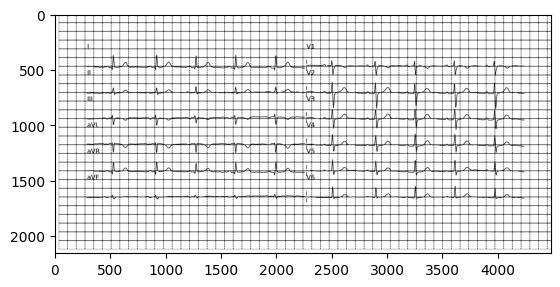

In [ ]:
import cv2          
import numpy as np     
import matplotlib.pyplot as plt

image1 = cv2.imread('/Users/omgitsshahg/Downloads/detection-dataset/images/26_6by2.jpg') 
# image1 = cv2.imread('/Users/omgitsshahg/Desktop/haha.png') 
  

img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
  
# applying Otsu thresholding 
# as an extra flag in binary  
# thresholding      
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)      
  

plt.imshow(thresh1,cmap="gray")

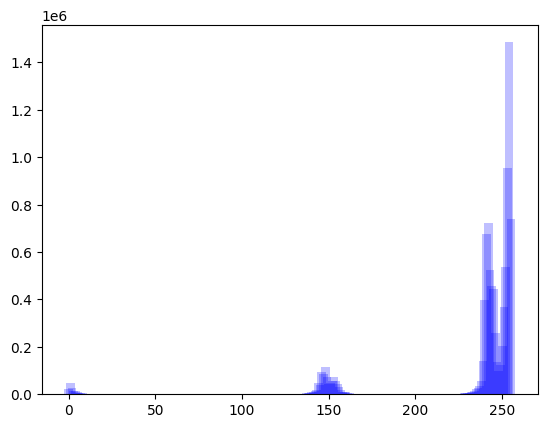

optimal threshold 127


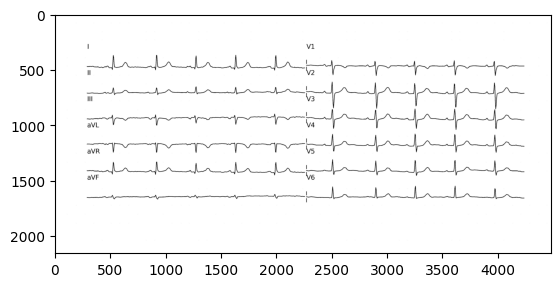

In [7]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


threshold_values = {}
h = [1]


def Hist(img):
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y


def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y



def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i

    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v


def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)

        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))

        V2w = wb * (vb)*(vb) + wf * (vf)*(vf)
        V2b = wb * wf * (mb - mf)**2

        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")

        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")

        if not math.isnan(V2w):
            threshold_values[i] = V2w


def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print ('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]


image = Image.open('/Users/omgitsshahg/Downloads/detection-dataset/images/26_6by2.jpg').convert("L")
img = np.asarray(image)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.imshow(res,cmap="gray")
plt.savefig("otsu.jpg") 

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('e.png')
img=res
img = np.full((1130,1566), 6, np.uint8)
converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
dst = cv.fastNlMeansDenoisingColored(converted_img,None,10,10,7,21)

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

i=res

gray = np.float64(i)
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
# Add this noise to images
noisy = i+noise 
# Convert back to uint8
noisy = np.uint8(np.clip(i,0,255))


dst=cv.fastNlMeansDenoising(noisy,dst,3,7,21)



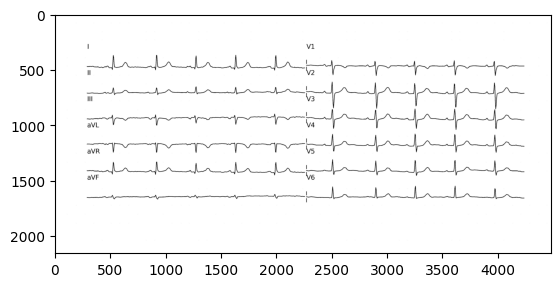

In [10]:
plt.imshow(gray,'gray')

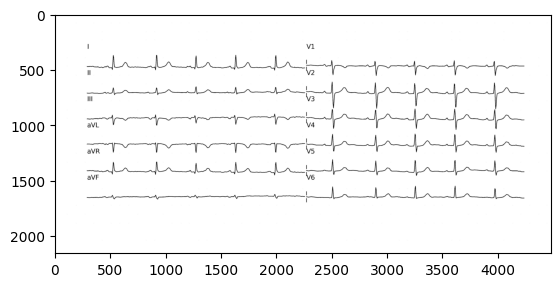

In [11]:
plt.imshow(noisy,'gray')

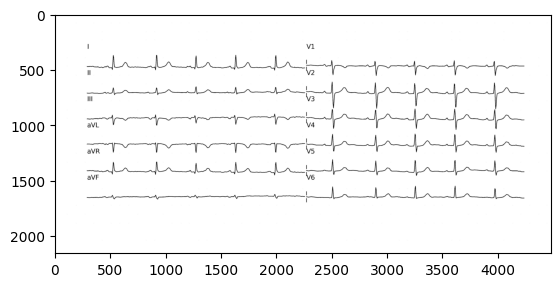

In [12]:
plt.imshow(dst,'gray')

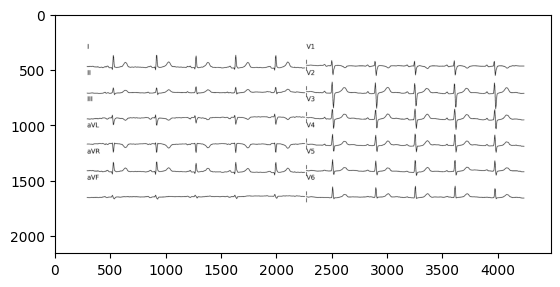

In [13]:
img=dst
for i in range (0,img.shape[0]-10):
  for j in range (0,img.shape[1]-10):
    if img[i][j]==0:
      #check
      count=0
      for k in range (i-5,i+5):
        for l in range (j-5,j+5):
          if img[k][l]==0:
            count=count+1
      if(count<5):
        img[i][j]=255

plt.imshow(img,cmap="gray")


In [14]:
cv2.imwrite('cleaned2.jpg',img)

True

# segmentation

perfect code for without grid segmentation

In [15]:
# import cv2
# import numpy as np
# import os

# # with grid
# path_raw   = "/Users/omgitsshahg/Desktop/haha.png" 
# #without grid
# path_clean = "/Users/omgitsshahg/Downloads/cleaned2.jpg"
# output_folder = "/Users/omgitsshahg/Downloads/lol2"
# os.makedirs(output_folder, exist_ok=True)
# # ------------------------------------
# # LOAD IMAGES
# # ------------------------------------
# img_clean = cv2.imread(path_clean, cv2.IMREAD_GRAYSCALE)
# img_raw   = cv2.imread(path_raw,   cv2.IMREAD_GRAYSCALE)

# # assert img_clean.shape == img_raw.shape, "[ERROR] Images must have same dimensions!"

# H, W = img_clean.shape
# print(f"[INFO] Image size: {W}x{H}")

# # ------------------------------------
# # BINARIZE CLEAN IMAGE FOR CC
# # ------------------------------------
# _, binary = cv2.threshold(img_clean, 127, 255, cv2.THRESH_BINARY_INV)

# # ------------------------------------
# # CONNECTED COMPONENTS
# # ------------------------------------
# num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
# print(f"[INFO] Found {num_labels - 1} components (excluding background)")

# # ------------------------------------
# # FILTER BLOBS
# # ------------------------------------
# min_area = 1000  # tweak as needed
# blobs = []
# for i in range(1, num_labels):  # skip background
#     x, y, w, h, area = stats[i]
#     if area < min_area:
#         continue
#     cx, cy = centroids[i]
#     blobs.append({
#         "bbox": (x, y, w, h),
#         "centroid": (cx, cy)
#     })

# print(f"[INFO] After filtering: {len(blobs)} blobs")

# if len(blobs) != 12:
#     print(f"[WARNING] Expected 12 blobs, found {len(blobs)} – adjust cleaning/thresholding!")

# # ------------------------------------
# # SORT BLOBS INTO 6x2 GRID
# # ------------------------------------
# # 1. Sort all by Y
# blobs_sorted_y = sorted(blobs, key=lambda b: b["centroid"][1])

# # 2. Split into 6 rows of 2
# rows = []
# for i in range(6):
#     row_blobs = blobs_sorted_y[i*2:(i+1)*2]
#     # sort left-to-right in each row
#     row_blobs_sorted = sorted(row_blobs, key=lambda b: b["centroid"][0])
#     rows.append(row_blobs_sorted)

# # 3. Flatten back into grid order
# final_blobs_sorted = [b for row in rows for b in row]

# # ------------------------------------
# # DEFINE LEAD NAMES
# # ------------------------------------
# lead_names = [
#     "I", "V1",
#     "II", "V2",
#     "III", "V3",
#     "AVL", "V4",
#     "AVR", "V5",
#     "AVF", "V6"
# ]

# # ------------------------------------
# # CROP FROM RAW IMAGE & SAVE
# # ------------------------------------
# for idx, blob in enumerate(final_blobs_sorted):
#     x, y, w, h = blob["bbox"]

#     # Crop from RAW image (with grid)
#     crop_raw = img_raw[y:y+h, x:x+w]

#     label = lead_names[idx]
#     save_path = os.path.join(output_folder, f"{idx+1}_{label}.png")
#     cv2.imwrite(save_path, crop_raw)

#     print(f"[INFO] Saved: {save_path} | bbox=({x},{y},{w},{h})")


In [16]:
import os
import cv2
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt



input_raw_folder = "/Users/omgitsshahg/Downloads/clean-ecg-6by2"
output_cleaned_folder = "/Users/omgitsshahg/Downloads/cleaned_images"
output_segments_folder = "/Users/omgitsshahg/Downloads/segmented_leads"

os.makedirs(output_cleaned_folder, exist_ok=True)
os.makedirs(output_segments_folder, exist_ok=True)



def custom_threshold(img):
    threshold_values = {}
    h = [1]

    def Hist(img):
        row, col = img.shape
        y = np.zeros(256)
        for i in range(row):
            for j in range(col):
                y[img[i, j]] += 1
        return y

    def countPixel(h):
        return np.sum(h > 0)

    def wieght(s, e):
        return np.sum(h[s:e])

    def mean(s, e):
        w = wieght(s, e)
        return np.sum(h[s:e] * np.arange(s, e)) / float(w)

    def variance(s, e):
        m = mean(s, e)
        w = wieght(s, e)
        return np.sum(((np.arange(s, e) - m) ** 2) * h[s:e]) / w

    def threshold(h):
        cnt = countPixel(h)
        for i in range(1, len(h)):
            vb = variance(0, i)
            wb = wieght(0, i) / float(cnt)
            mb = mean(0, i)
            vf = variance(i, len(h))
            wf = wieght(i, len(h)) / float(cnt)
            mf = mean(i, len(h))
            V2w = wb * (vb)*(vb) + wf * (vf)*(vf)
            if not math.isnan(V2w):
                threshold_values[i] = V2w

    def get_optimal_threshold():
        min_V2w = min(threshold_values.values())
        optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w][0]
        return optimal_threshold

    # Your steps
    h = Hist(img)
    threshold(h)
    op_thres = get_optimal_threshold()
    res = np.where(img >= op_thres, 255, 0).astype(np.uint8)
    return res




# def clean_noise_and_grid(binary_img):
#     noise = np.random.randn(*binary_img.shape) * 10
#     noisy = np.float64(binary_img) + noise
#     noisy = np.uint8(np.clip(noisy, 0, 255))
#     # denoised = cv2.fastNlMeansDenoising(noisy, None, 30, 7, 21) #main one
#     # denoised = cv2.fastNlMeansDenoising(noisy, None, 10, 3, 7)
#     denoised = cv2.medianBlur(noisy, 5)


#     final = denoised.copy()
#     rows, cols = final.shape
#     for i in range(5, rows - 5):
#         for j in range(5, cols - 5):
#             if final[i, j] == 0:
#                 count = np.sum(final[i - 5:i + 5, j - 5:j + 5] == 0)
#                 if count < 5:
#                     final[i, j] = 255
#     return final
def clean_noise_and_grid(binary_img):
    noise = np.random.randn(*binary_img.shape) * 10
    noisy = np.float64(binary_img) + noise
    noisy = np.uint8(np.clip(noisy, 0, 255))

    # Median Blur - cheap denoising
    denoised = cv2.medianBlur(noisy, 5)

    # Morphological Opening to remove small black noise
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned = cv2.morphologyEx(denoised, cv2.MORPH_OPEN, kernel, iterations=1)

    return cleaned


def clean_and_save(input_path, output_path):
    image = Image.open(input_path).convert("L")
    img = np.asarray(image)
    binary = custom_threshold(img)
    cleaned = clean_noise_and_grid(binary)
    cv2.imwrite(output_path, cleaned)



def segment_leads_from_clean_and_raw(clean_img_path, raw_img_path, output_subfolder):
    os.makedirs(output_subfolder, exist_ok=True)

    img_clean = cv2.imread(clean_img_path, cv2.IMREAD_GRAYSCALE)
    img_raw   = cv2.imread(raw_img_path, cv2.IMREAD_GRAYSCALE)

    assert img_clean.shape == img_raw.shape, "[ERROR] Images must have same dimensions!"

    # Threshold for CC
    _, binary = cv2.threshold(img_clean, 127, 255, cv2.THRESH_BINARY_INV)

    # Connected Components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)
    min_area = 1000
    blobs = []
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area < min_area:
            continue
        cx, cy = centroids[i]
        blobs.append({"bbox": (x, y, w, h), "centroid": (cx, cy)})

    if len(blobs) != 12:
        print(f"[WARNING] {os.path.basename(raw_img_path)} - Expected 12 blobs, found {len(blobs)}")


    blobs_sorted_y = sorted(blobs, key=lambda b: b["centroid"][1])
    rows = []
    for i in range(6):
        row_blobs = blobs_sorted_y[i*2:(i+1)*2]
        row_blobs_sorted = sorted(row_blobs, key=lambda b: b["centroid"][0])
        rows.extend(row_blobs_sorted)

    lead_names = [
        "I", "V1",
        "II", "V2",
        "III", "V3",
        "AVL", "V4",
        "AVR", "V5",
        "AVF", "V6"
    ]

    # Save crops
    for idx, blob in enumerate(rows):
        x, y, w, h = blob["bbox"]
        crop = img_raw[y:y+h, x:x+w]
        label = lead_names[idx] if idx < len(lead_names) else f"Lead{idx+1}"
        save_path = os.path.join(output_subfolder, f"{idx+1}_{label}.png")
        cv2.imwrite(save_path, crop)



for filename in os.listdir(input_raw_folder):
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    raw_path = os.path.join(input_raw_folder, filename)
    cleaned_path = os.path.join(output_cleaned_folder, filename)
    cleaned_subfolder = os.path.join(output_segments_folder, os.path.splitext(filename)[0])

    print(f"\n[INFO] Processing: {filename}")

    # STEP 1 - Clean
    clean_and_save(raw_path, cleaned_path)
    print(f"[INFO] Saved cleaned: {cleaned_path}")

    # STEP 2 - Segment
    segment_leads_from_clean_and_raw(cleaned_path, raw_path, cleaned_subfolder)
    print(f"[INFO] Saved segments to: {cleaned_subfolder}")



[INFO] Processing: 1110_6by2.jpg
[INFO] Saved cleaned: /Users/omgitsshahg/Downloads/cleaned_images/1110_6by2.jpg
[INFO] Saved segments to: /Users/omgitsshahg/Downloads/segmented_leads/1110_6by2

[INFO] Processing: 54_6by2.jpg
[INFO] Saved cleaned: /Users/omgitsshahg/Downloads/cleaned_images/54_6by2.jpg
[INFO] Saved segments to: /Users/omgitsshahg/Downloads/segmented_leads/54_6by2

[INFO] Processing: 522_6by2.jpg
[INFO] Saved cleaned: /Users/omgitsshahg/Downloads/cleaned_images/522_6by2.jpg
[WARNING] 522_6by2.jpg - Expected 12 blobs, found 18
[INFO] Saved segments to: /Users/omgitsshahg/Downloads/segmented_leads/522_6by2

[INFO] Processing: 822_6by2.jpg
[INFO] Saved cleaned: /Users/omgitsshahg/Downloads/cleaned_images/822_6by2.jpg
[INFO] Saved segments to: /Users/omgitsshahg/Downloads/segmented_leads/822_6by2

[INFO] Processing: 1586_6by2.jpg
[INFO] Saved cleaned: /Users/omgitsshahg/Downloads/cleaned_images/1586_6by2.jpg
[INFO] Saved segments to: /Users/omgitsshahg/Downloads/segmented_

/var/folders/ft/fpkvr_4x0cj83gqrvdz8np500000gn/T/ipykernel_47926/948247720.py:39: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(h[s:e] * np.arange(s, e)) / float(w)


## U-Net to extract wave only

In [17]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as T

from skimage.morphology import skeletonize


Dataset class

In [18]:
class ECGSegmentationDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_names = sorted([
            f for f in os.listdir(images_dir)
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
        ])
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.images_dir, img_name)
        mask_path = os.path.join(self.masks_dir, img_name)

        image = Image.open(img_path).convert('L')
        mask = Image.open(mask_path).convert('L')

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        else:
            transform = T.Compose([
                T.Resize((256, 256)),
                T.ToTensor()
            ])
            image = transform(image)
            mask = transform(mask)

        return image, mask


In [19]:
transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor()
])

In [20]:
full_dataset = ECGSegmentationDataset(
    images_dir='/Users/omgitsshahg/Downloads/overlap-dataset/with-overlap/combined image (without overlap as well)',
    masks_dir='/Users/omgitsshahg/Downloads/overlap-dataset/with-overlap/combined mask-png (without overlap as well)',
    transform=transform
)

total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)   
)

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")


Train: 200, Val: 42, Test: 44


In [21]:
total_size

286

In [22]:
batch_size = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [23]:
class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super(UNet, self).__init__()

        def CBR(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1),
                nn.BatchNorm2d(out_c),
                nn.ReLU(inplace=True)
            )

        self.enc1 = nn.Sequential(CBR(in_channels, 64), CBR(64, 64))
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = nn.Sequential(CBR(64, 128), CBR(128, 128))
        self.pool2 = nn.MaxPool2d(2)

        self.bottleneck = nn.Sequential(CBR(128, 256), CBR(256, 256))

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = nn.Sequential(CBR(256, 128), CBR(128, 128))
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = nn.Sequential(CBR(128, 64), CBR(64, 64))

        self.final = nn.Conv2d(64, out_channels, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        b = self.bottleneck(self.pool2(e2))
        d2 = self.dec2(torch.cat([self.up2(b), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        return self.final(d1)


In [24]:
bce_loss_fn = nn.BCEWithLogitsLoss()

def dice_loss(pred, target, smooth=1):
    pred = torch.sigmoid(pred)
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    return 1 - (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

def combined_loss(pred, target):
    bce = bce_loss_fn(pred, target)
    dice = dice_loss(pred, target)
    return bce + dice


In [25]:
def dice_coefficient(pred, target, smooth=1):
    pred = (pred > 0.5).float()
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum()
    return (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)


In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 20

train_losses = []
val_losses = []
train_dices = []
val_dices = []
best_val_loss = float('inf')


In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0
    running_train_dice = 0

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = combined_loss(outputs, masks)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        running_train_dice += dice_coefficient(torch.sigmoid(outputs), masks).item()

    avg_train_loss = running_train_loss / len(train_loader)
    avg_train_dice = running_train_dice / len(train_loader)
    train_losses.append(avg_train_loss)
    train_dices.append(avg_train_dice)

    print(f" Epoch {epoch+1}/{num_epochs} - Training Loss: {avg_train_loss:.4f}, Training Dice: {avg_train_dice:.4f}")


 Epoch 1/20 - Training Loss: 0.9991, Training Dice: 0.6812
 Epoch 2/20 - Training Loss: 0.6265, Training Dice: 0.7374


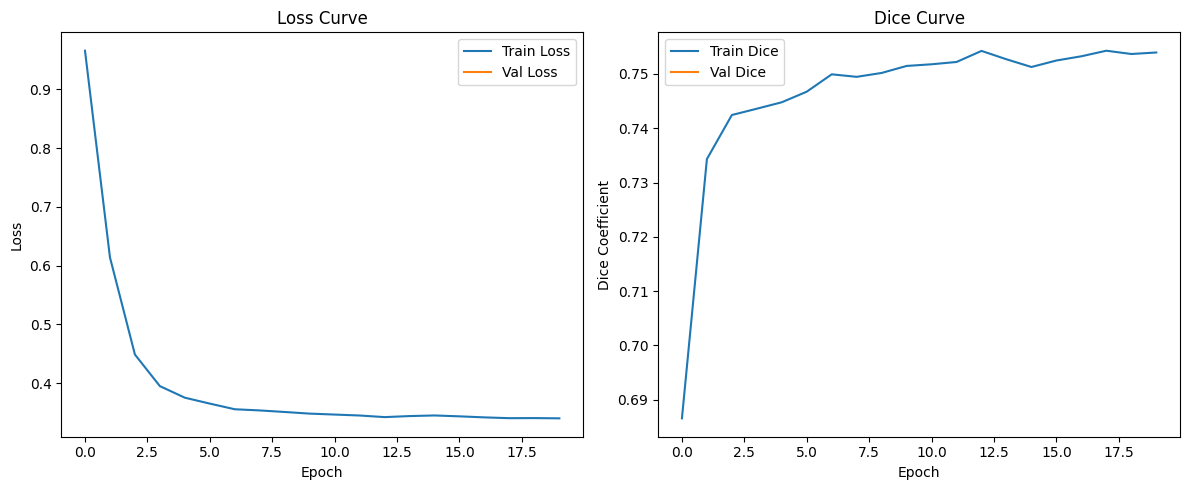

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_dices, label='Train Dice')
plt.plot(val_dices, label='Val Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.title('Dice Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_losses = []
test_dices = []

with torch.no_grad():
    for i, (image, mask) in enumerate(test_loader):
        image, mask = image.to(device), mask.to(device)
        output = model(image)
        loss = combined_loss(output, mask)
        dice = dice_coefficient(torch.sigmoid(output), mask)

        test_losses.append(loss.item())
        test_dices.append(dice.item())

        # Save predicted mask
        pred_mask = torch.sigmoid(output).cpu().squeeze().numpy()
        pred_binary = (pred_mask > 0.5).astype(np.uint8) * 255
        Image.fromarray(pred_binary).save(f"pred_mask_{i}.png")


In [ ]:
print(f"Average Test Loss: {np.mean(test_losses):.4f}")
print(f"Average Test Dice Coefficient: {np.mean(test_dices):.4f}")

Average Test Loss: 0.3084
Average Test Dice Coefficient: 0.7740


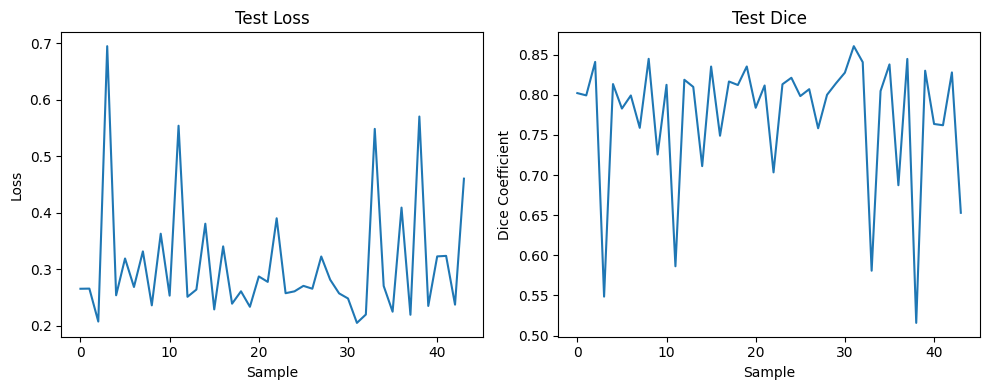

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(test_losses, label='Test Loss per sample')
plt.xlabel('Sample')
plt.ylabel('Loss')
plt.title('Test Loss')

plt.subplot(1,2,2)
plt.plot(test_dices, label='Test Dice per sample')
plt.xlabel('Sample')
plt.ylabel('Dice Coefficient')
plt.title('Test Dice')

plt.tight_layout()
plt.show()

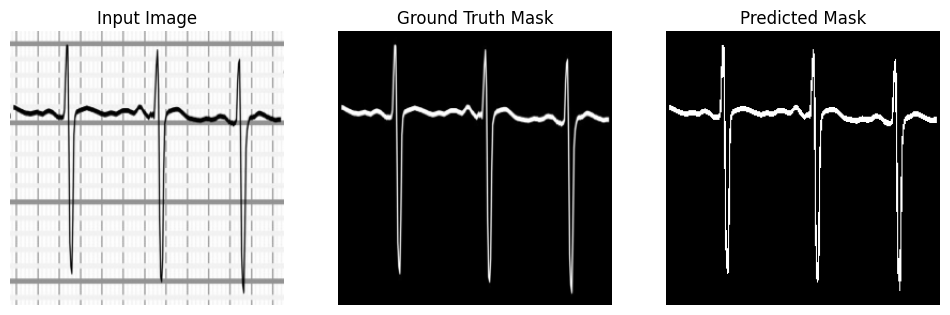

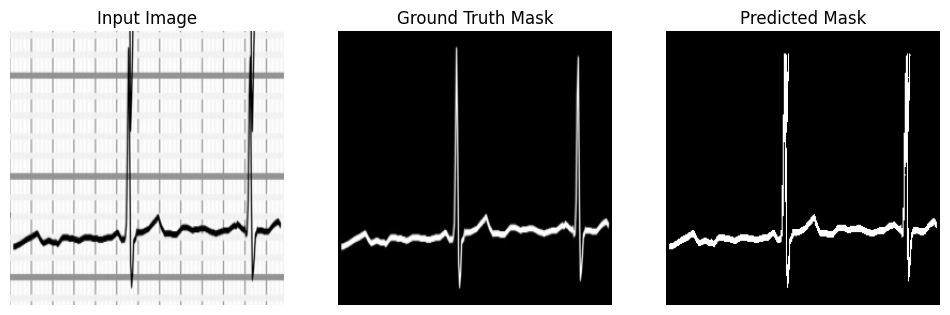

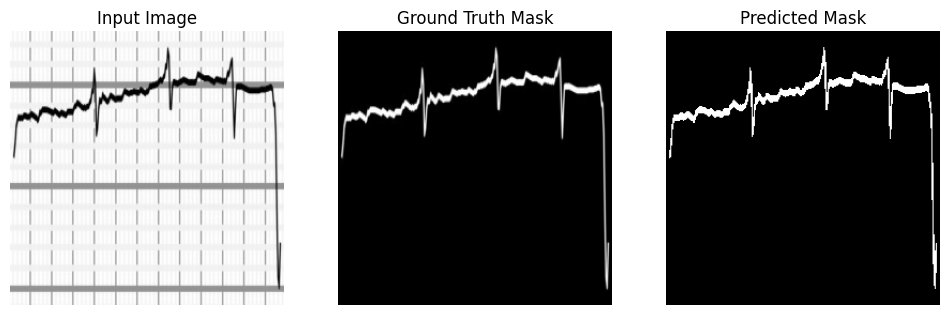

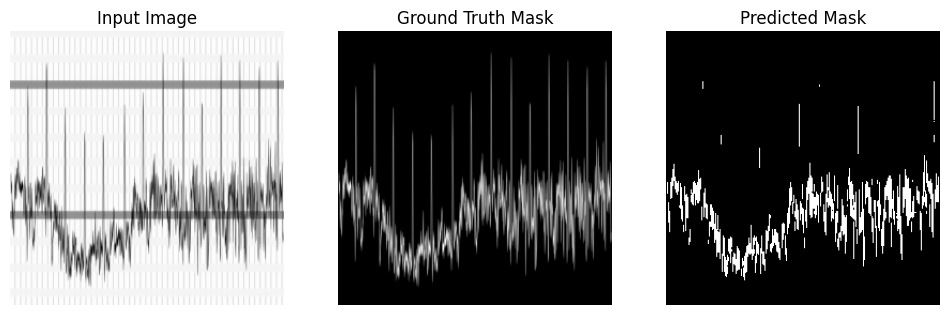

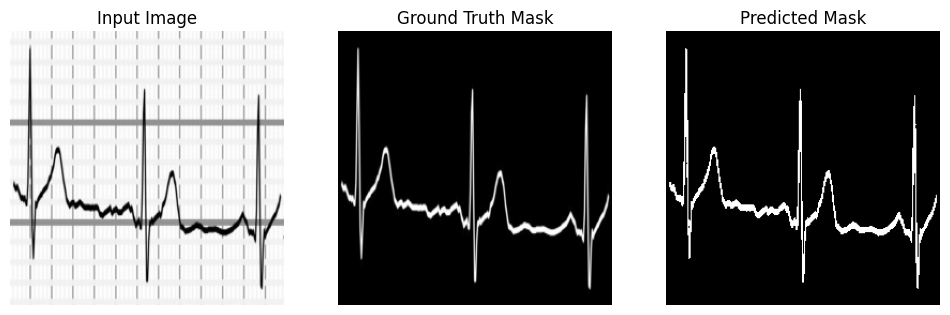

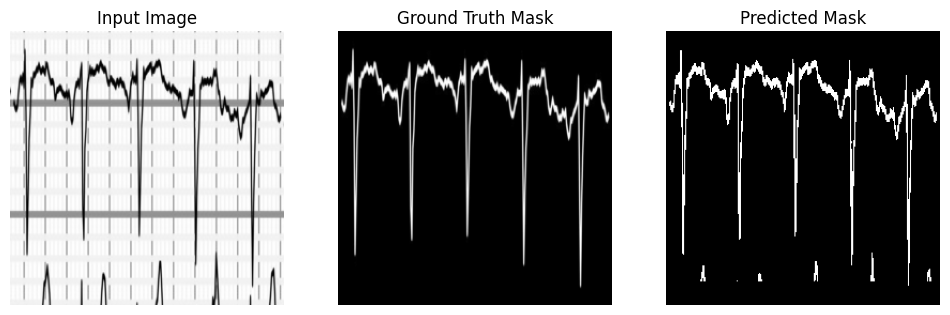

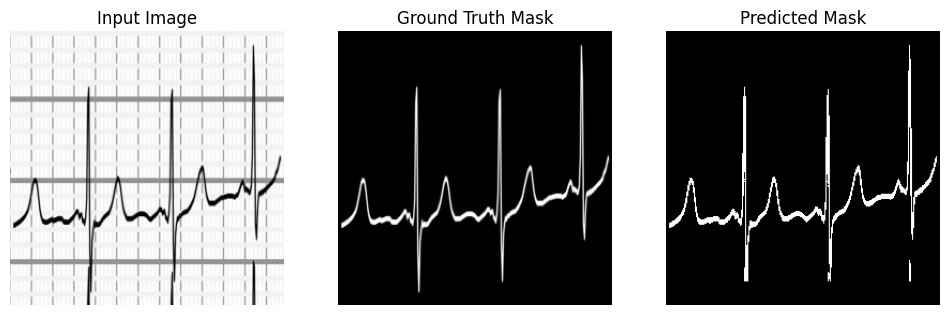

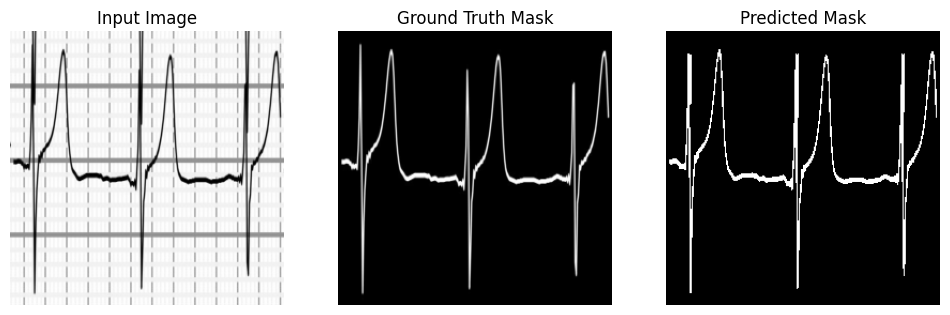

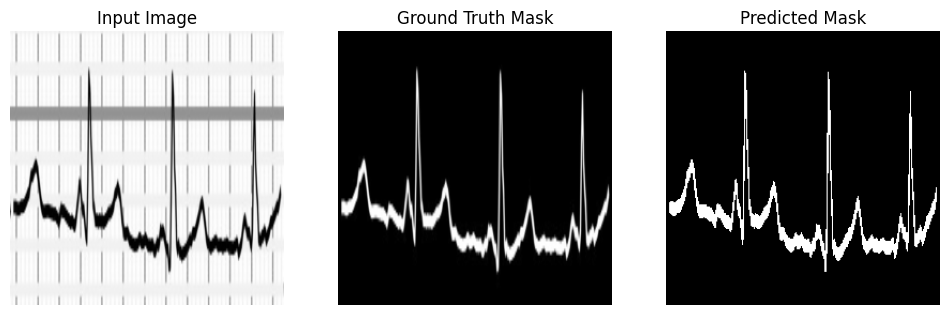

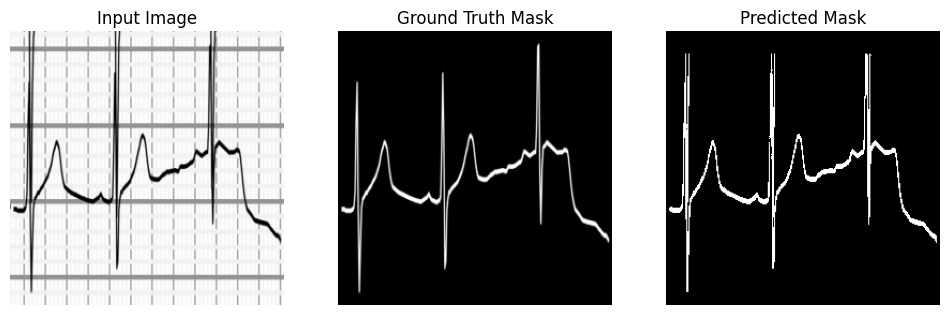

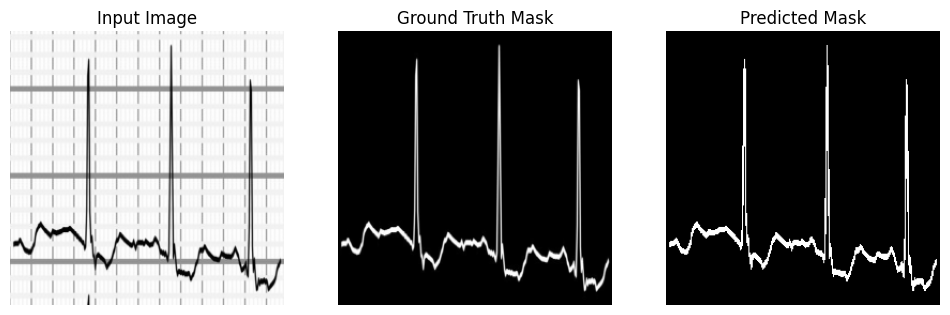

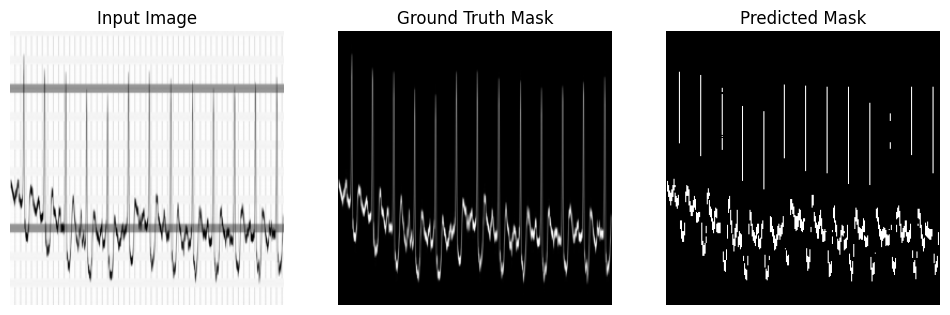

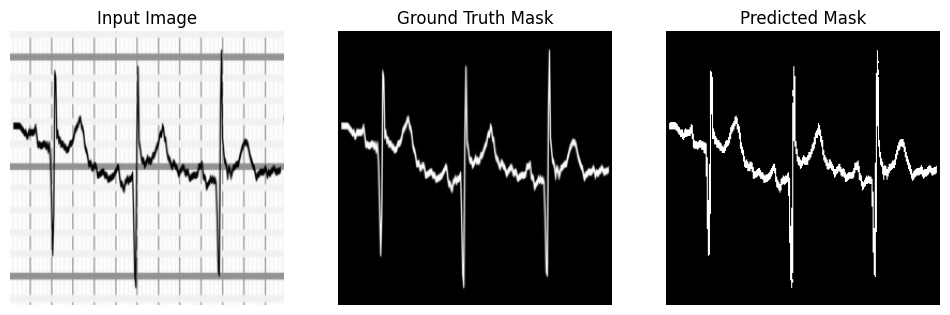

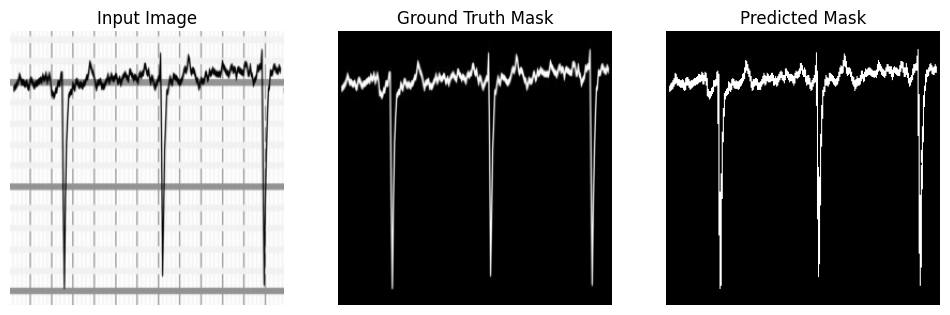

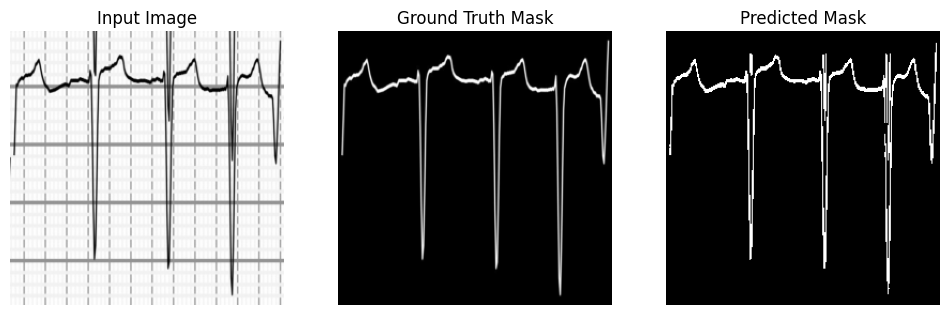

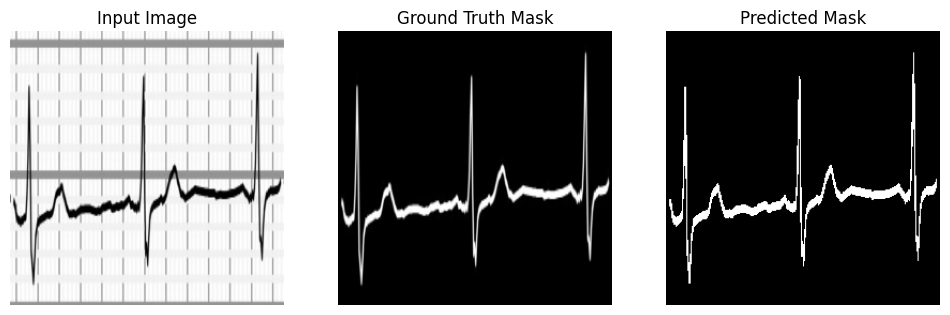

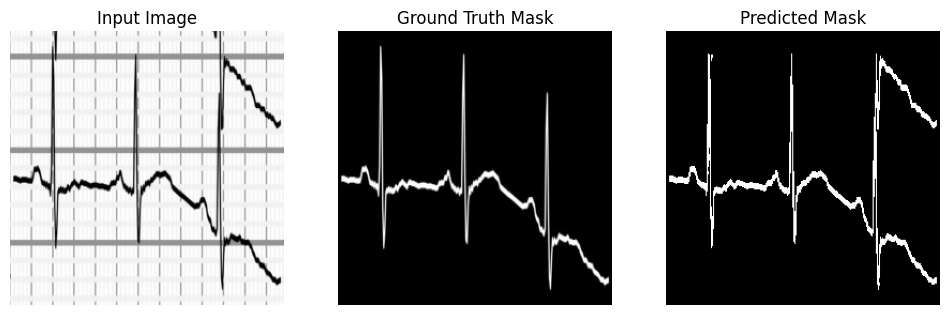

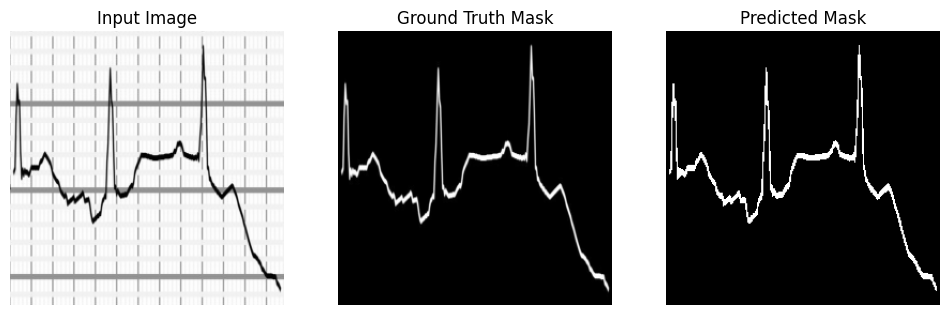

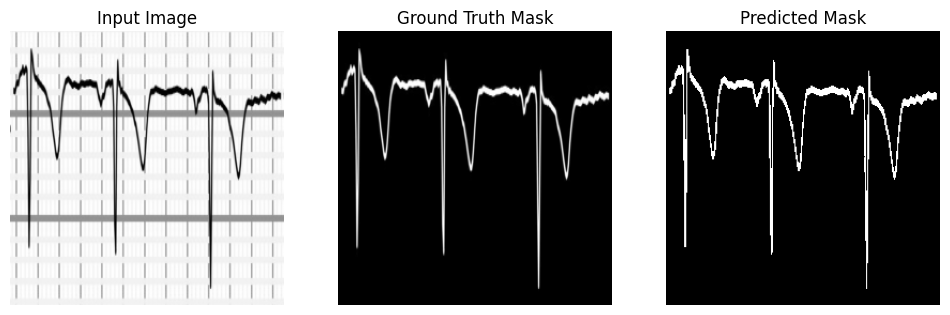

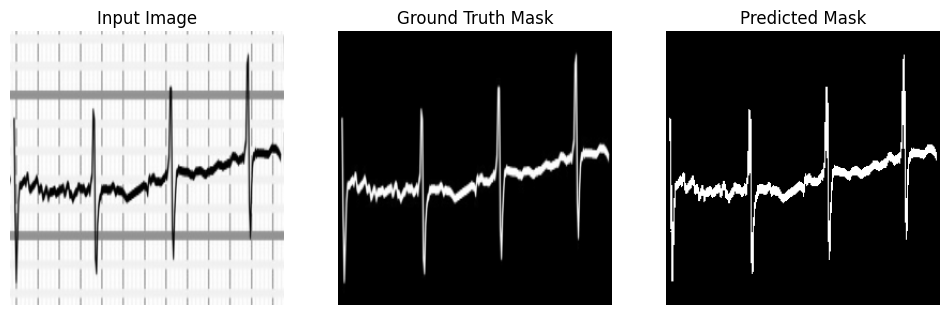

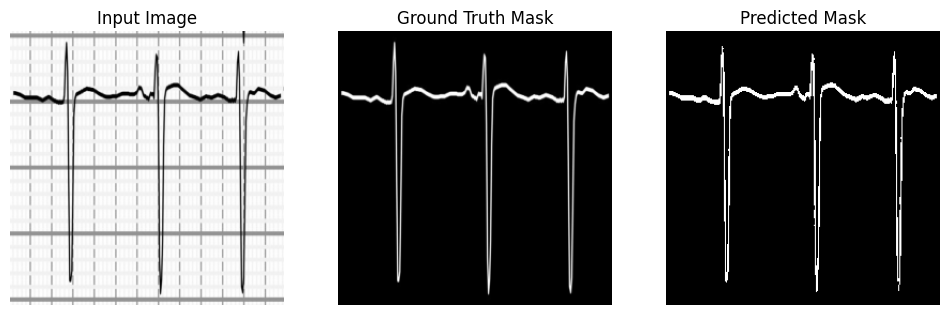

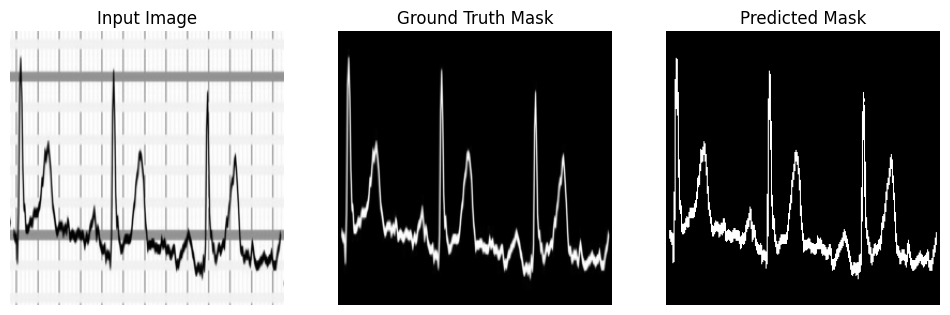

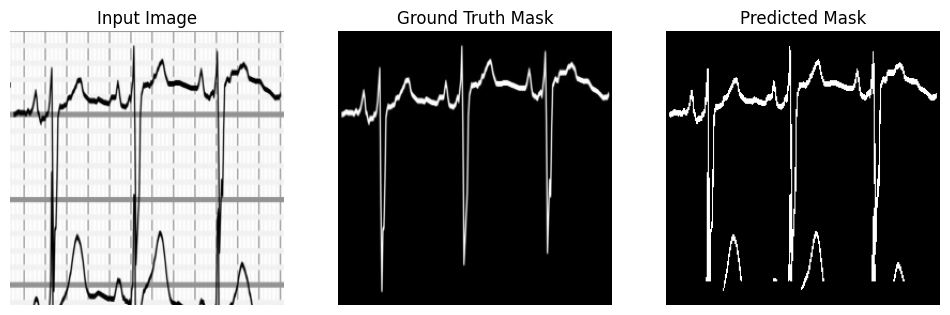

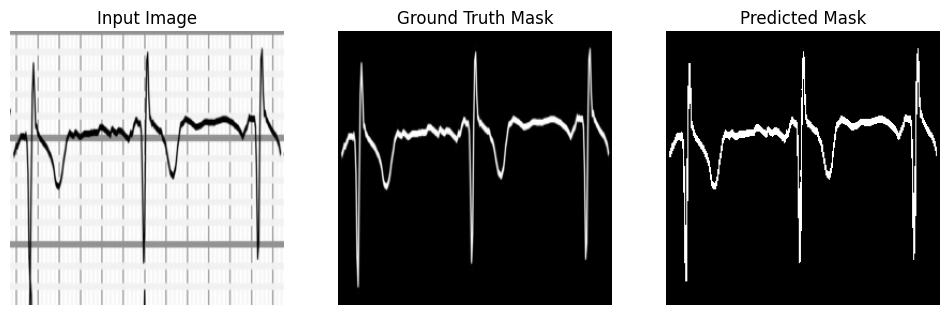

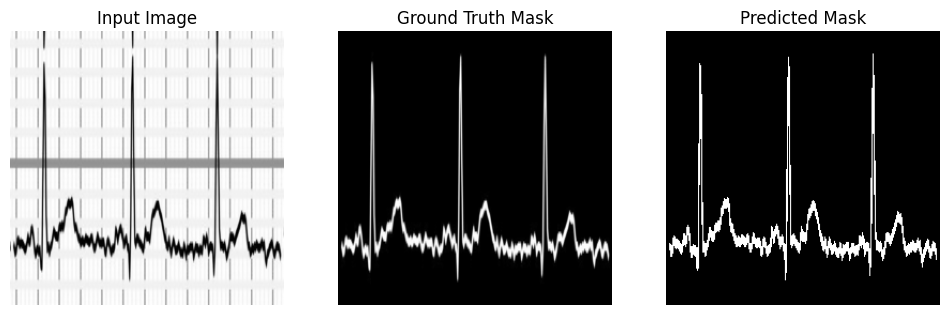

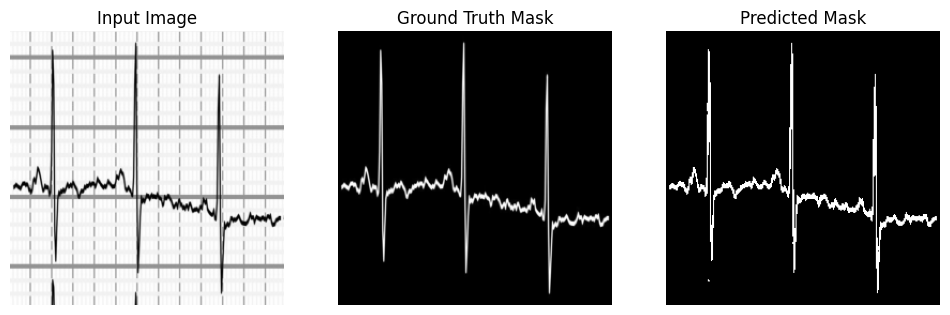

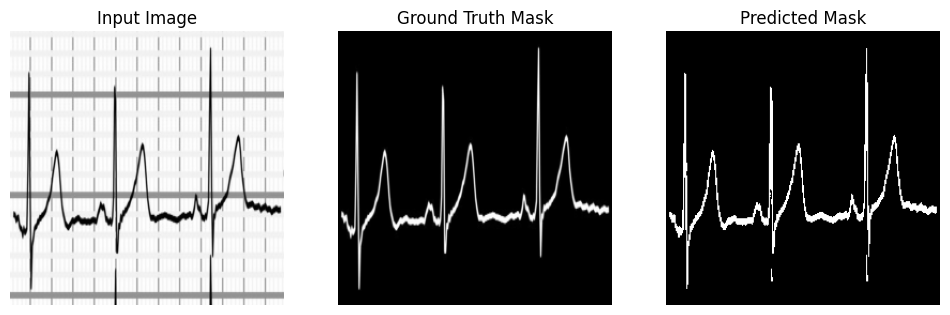

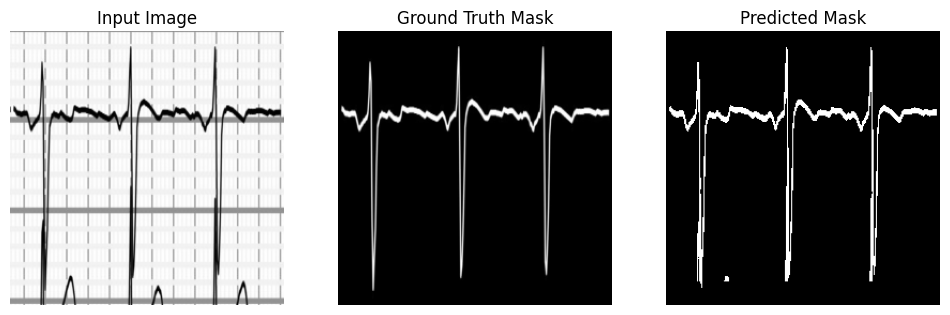

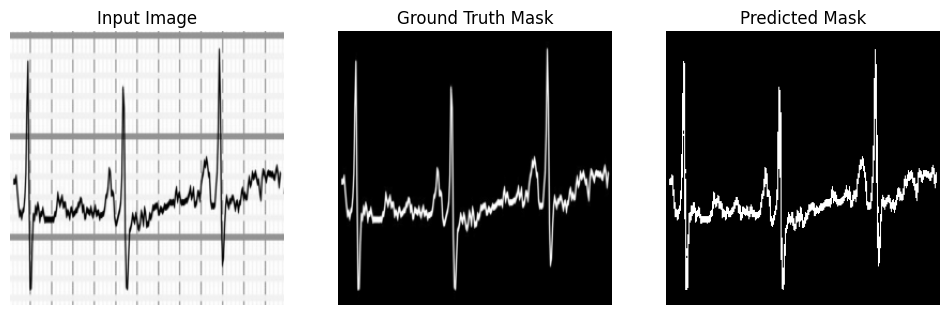

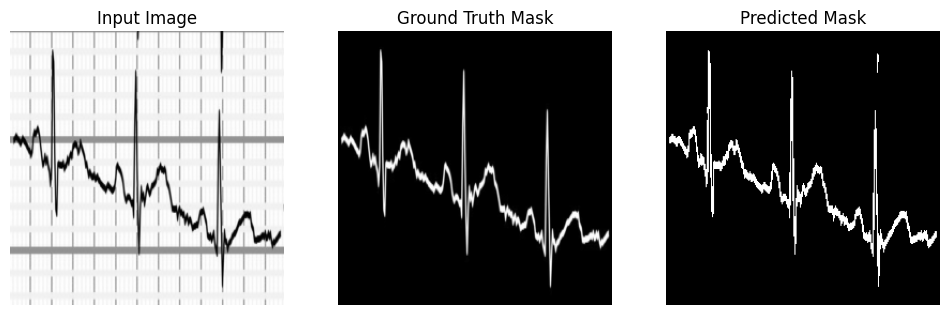

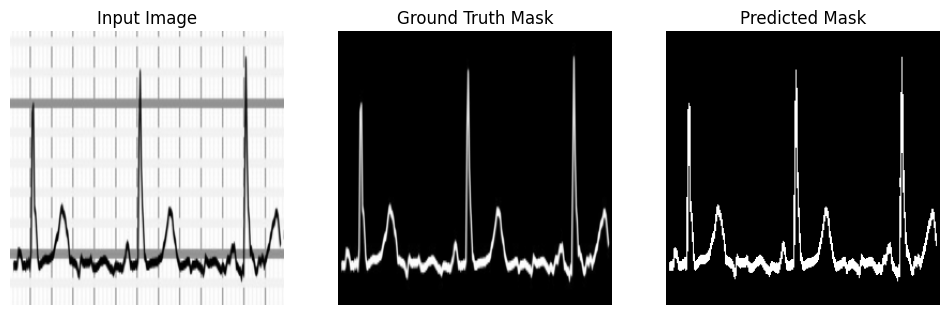

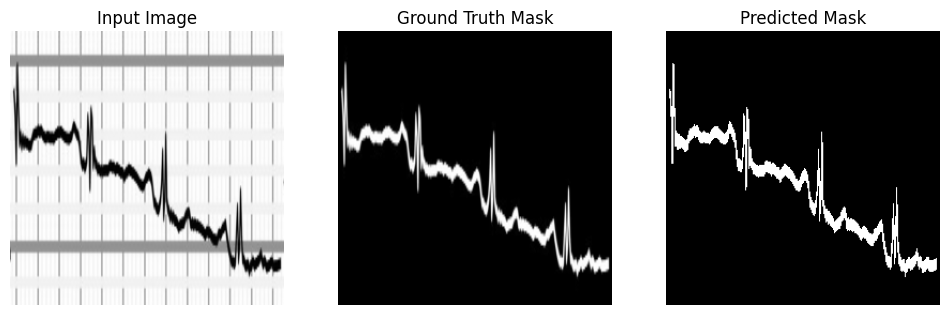

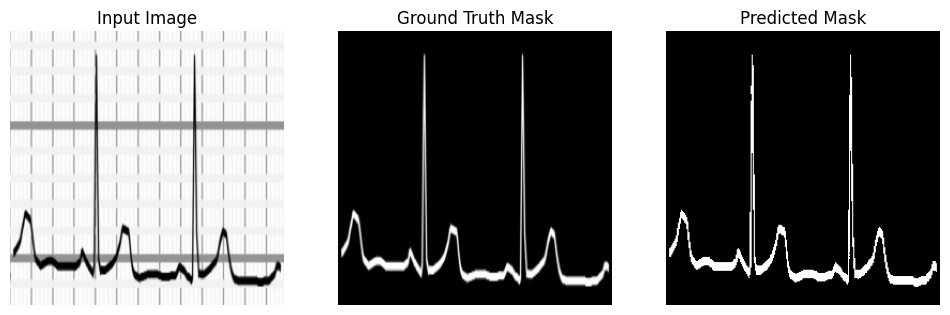

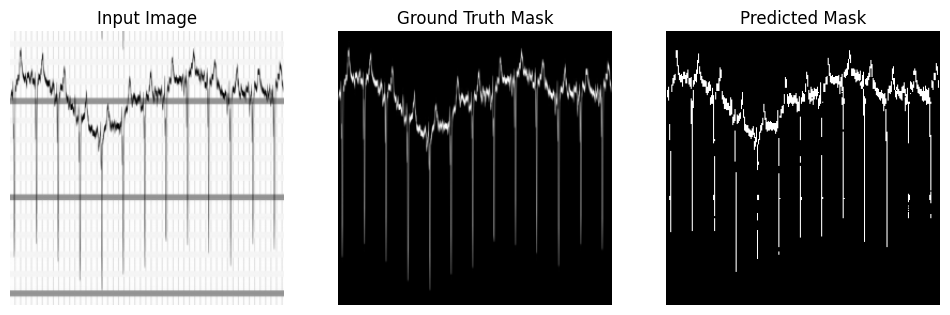

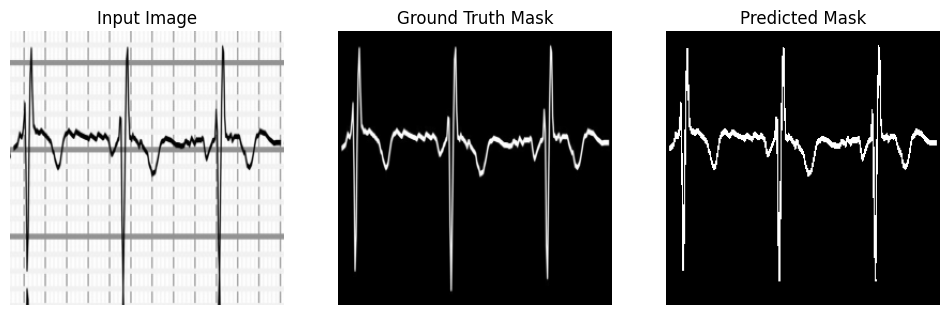

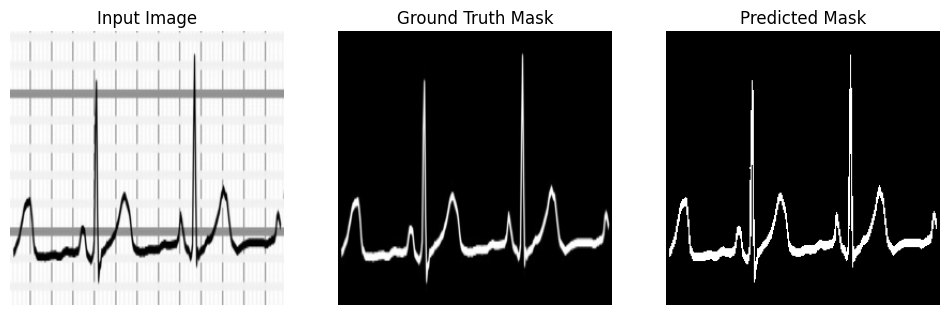

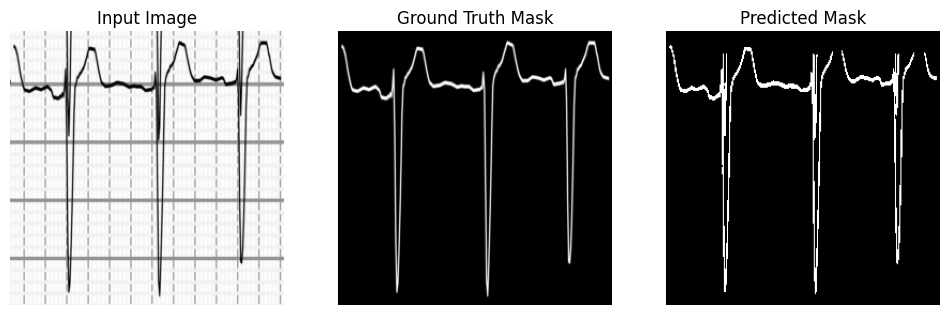

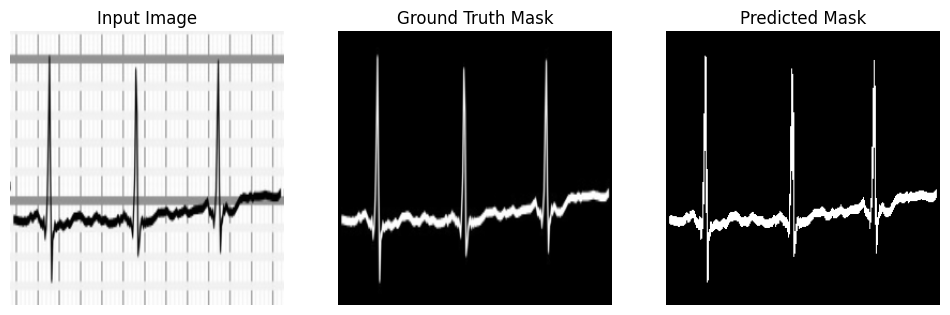

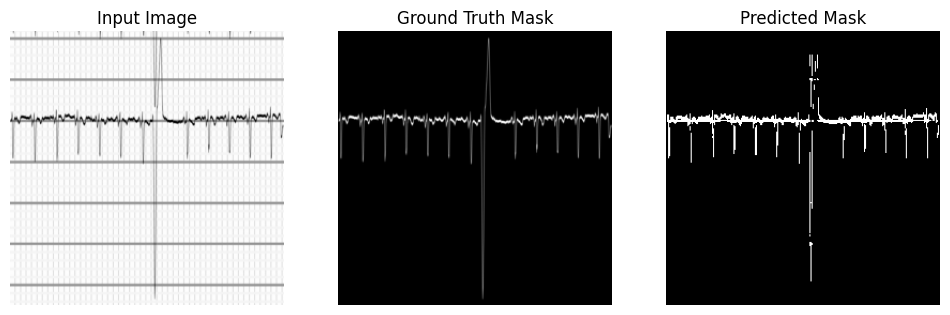

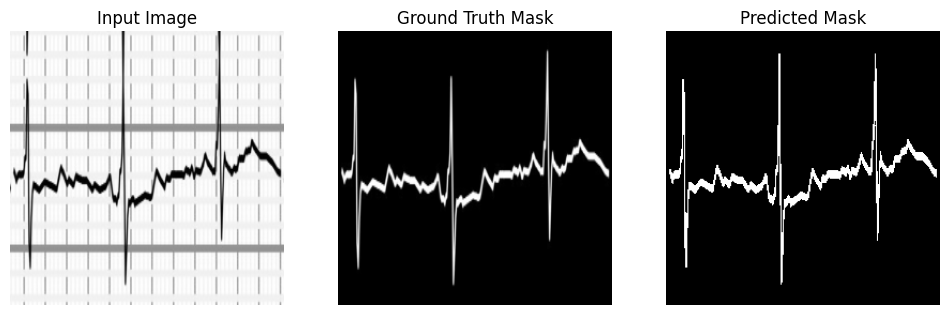

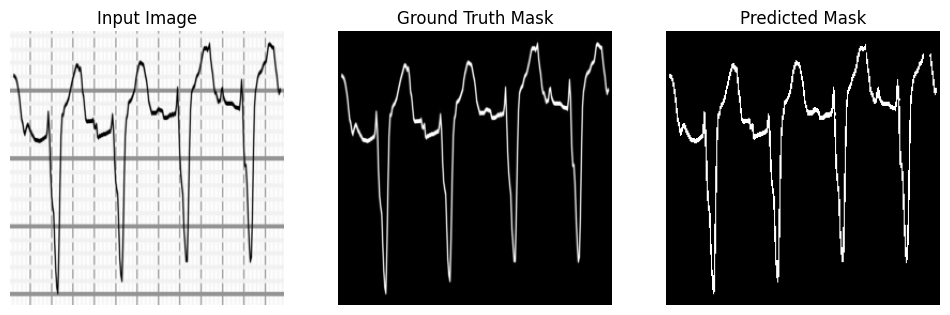

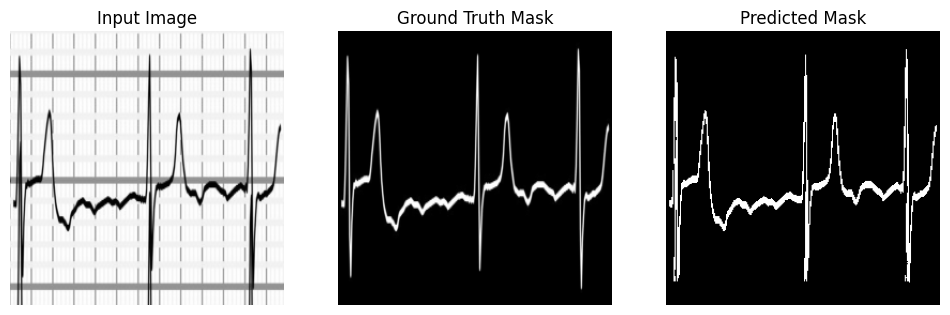

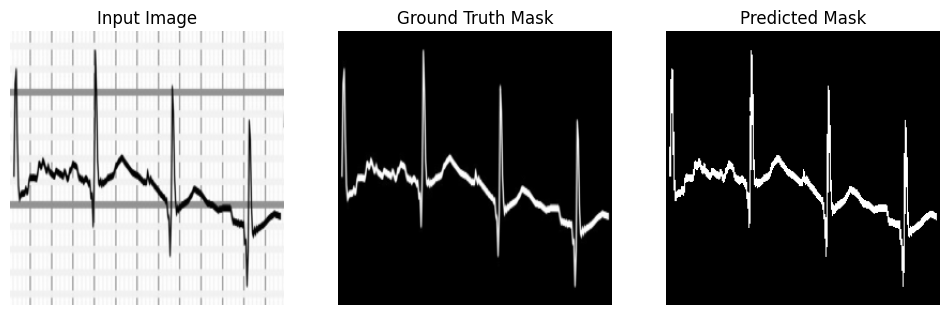

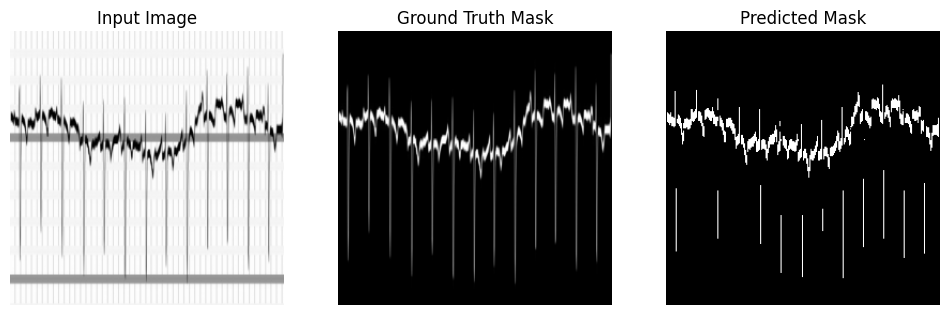

In [ ]:
for i in range(len(test_dataset)):
    image, mask = test_dataset[i]
    image_input = image.unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_input)
        pred = torch.sigmoid(output).cpu().squeeze().numpy()

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title('Ground Truth Mask')
    plt.imshow(mask.squeeze().numpy(), cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title('Predicted Mask')
    plt.imshow(pred > 0.5, cmap='gray')
    plt.axis('off')

    plt.show()
    

In [ ]:
# import torch
# torch.save(model.state_dict(), 'unetWaveExtract.pth')

model saved

## digitizing on a sample wave extracted (not through my model) 

In [ ]:
orig="/Users/omgitsshahg/Downloads/overlap-dataset/with-overlap/image/649_3by4_lead_4.png"
mask="/Users/omgitsshahg/Downloads/overlap-dataset/with-overlap/mask-png/649_3by4_lead_4.png"

In [ ]:
import cv2
img= cv2.imread(orig)
mask= cv2.imread(mask)
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
wavetrace= cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

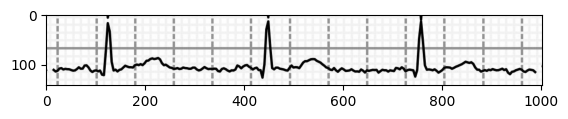

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(gray,cmap='gray')

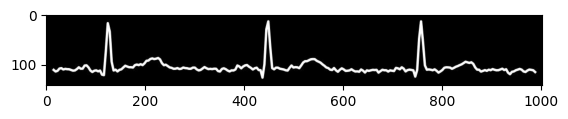

In [ ]:
plt.imshow(wavetrace,cmap='gray')

In [ ]:
clahe= cv2.createCLAHE(clipLimit=2.0)
gray=clahe.apply(gray)

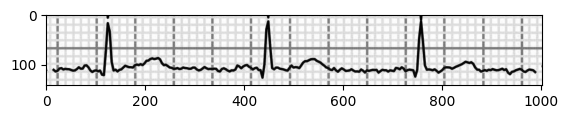

In [ ]:
plt.imshow(gray,cmap='gray')

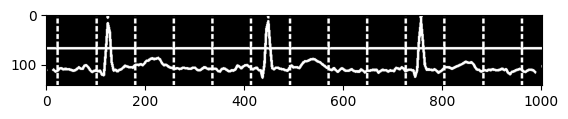

In [ ]:
_, binary= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary,cmap='gray')

Text(0.5, 1.0, 'Horizontal Projection Profile')

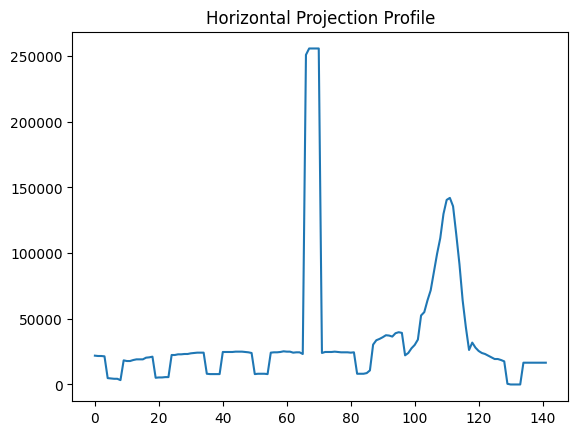

In [ ]:
import numpy as np

projection = np.sum(binary, axis=1)  # sum along x

plt.plot(projection)
plt.title('Horizontal Projection Profile')



In [ ]:
from scipy.signal import find_peaks

peaks, properties = find_peaks(
    projection, 
    distance=10,                 # minimum distance between grid lines (small so you don't miss fine lines)
    height=np.max(projection)*0.5  # ignore weak noise
)

print("Detected grid line Y positions:", peaks)

Detected grid line Y positions: [ 68 111]


In [ ]:
# sorted_peaks = np.sort(peaks)
# print("Sorted grid line positions:", sorted_peaks)


Sorted grid line positions: [ 68 111]


In [ ]:
# pixel_spacings = np.diff(sorted_peaks)
# print("Exact pixel distances between adjacent grid lines:", pixel_spacings)


Exact pixel distances between adjacent grid lines: [43]


In [ ]:
# # Among detected peaks, get their projection sums
# peak_heights = projection[sorted_peaks]

# # Pick the strongest one
# strongest_idx = np.argmax(peak_heights)
# baseline_y = sorted_peaks[strongest_idx]

# print(f"Chosen baseline (strongest grid line): {baseline_y}")

Chosen baseline (strongest grid line): 68


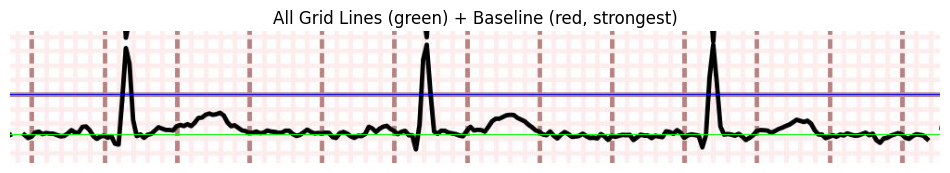

In [ ]:
# img_with_lines = img.copy()

# for y in sorted_peaks:
#     cv2.line(img_with_lines, (0, y), (img.shape[1], y), (0, 255, 0), 1)

# cv2.line(img_with_lines, (0, baseline_y), (img.shape[1], baseline_y), (255, 0, 0), 1)

# plt.figure(figsize=(12,6))
# plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
# plt.title('All Grid Lines (green) + Baseline (red, strongest)')
# plt.axis('off')
# plt.show()


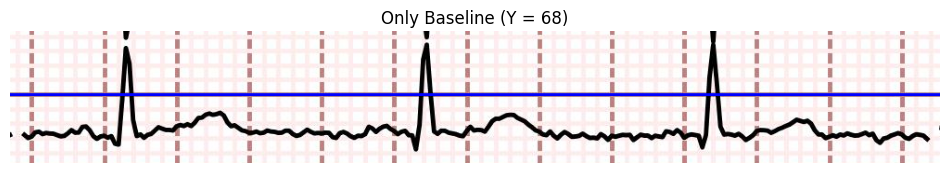

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt


# # Make a copy of the original image
# img_baseline_only = img.copy()

# cv2.line(img_baseline_only, (0, baseline_y), (img.shape[1], baseline_y), (255, 0, 0), 2)

# plt.figure(figsize=(12,6))
# plt.imshow(cv2.cvtColor(img_baseline_only, cv2.COLOR_BGR2RGB))
# plt.title(f'Only Baseline (Y = {baseline_y})')
# plt.axis('off')
# plt.show()


## logic for small boxes as well

In [ ]:
sorted_peaks  # your grid line Y-positions

array([ 68, 111])

In [ ]:
height, width = binary.shape
wave_trace_y = []

for x in range(width):
    ys = np.where(binary[:, x] > 0)[0]
    if len(ys) > 0:
        wave_trace_y.append(np.median(ys))  # or mean
    else:
        wave_trace_y.append(None)


In [ ]:
wave_trace_y = np.array(wave_trace_y)
valid_indices = np.where(wave_trace_y != None)[0]

# Find first region of wave
start_x = valid_indices[0]
end_x = start_x + 20  # look at first 20 columns of wave

start_region_ys = wave_trace_y[start_x:end_x]
start_region_ys = [y for y in start_region_ys if y is not None]


In [ ]:
avg_wave_start_y = np.mean(start_region_ys)
print(f"Average wave start Y = {avg_wave_start_y}")


Average wave start Y = 83.025


In [ ]:
distances = np.abs(sorted_peaks - avg_wave_start_y)
baseline_y = sorted_peaks[np.argmin(distances)]
print(f"Selected baseline Y-coordinate: {baseline_y}")


Selected baseline Y-coordinate: 68


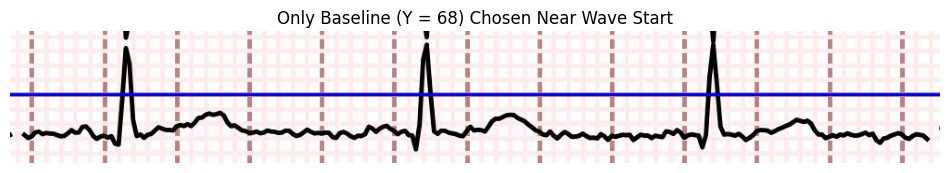

In [ ]:
img_baseline_only = img.copy()
cv2.line(img_baseline_only, (0, baseline_y), (img.shape[1], baseline_y), (255, 0, 0), 2)

plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(img_baseline_only, cv2.COLOR_BGR2RGB))
plt.title(f'Only Baseline (Y = {baseline_y}) Chosen Near Wave Start')
plt.axis('off')
plt.show()
